<a href="https://colab.research.google.com/github/iam-fern/Generate_addition_2X/blob/main/GQtest_data(y_hat)_add_delta_(4)_n30_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_addition_2X/addition_delta_4'

In [4]:
os.listdir(base_path)

['data_add_delta_4_n20.csv',
 'data_add_delta_4_n30.csv',
 'data_add_delta_4_n60.csv',
 'data_add_delta_4_n120.csv',
 'data_add_delta_4_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_4_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.311449,64.710193,3606.247162,3739.268805,475.303467,3263.965338
1,0.0,1.0,49.486462,62.864253,-6530.431611,-6408.080896,412.743811,-6820.824707
2,0.0,2.0,45.704096,82.485377,3539.079816,3677.269289,445.084112,3232.185177
3,0.0,3.0,81.950339,40.616627,-637.504928,-504.937962,558.727436,-1063.665399
4,0.0,4.0,39.773160,48.277865,3833.298403,3931.349427,307.504609,3623.844818
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.903928,91.752340,-7317.589896,-7169.933628,1119.987413,-8289.921041
29996,999.0,26.0,56.349005,89.031250,-666.883030,-511.502775,1234.229926,-1745.732701
29997,999.0,27.0,71.711832,47.026248,4515.644364,4644.382443,392.125424,4252.257018
29998,999.0,28.0,89.970996,50.494377,-1562.030001,-1411.564628,810.456535,-2222.021163


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.311449,64.710193,3606.247162,3739.268805,475.303467,3263.965338
1,0.0,1.0,49.486462,62.864253,-6530.431611,-6408.080896,412.743811,-6820.824707
2,0.0,2.0,45.704096,82.485377,3539.079816,3677.269289,445.084112,3232.185177
3,0.0,3.0,81.950339,40.616627,-637.504928,-504.937962,558.727436,-1063.665399
4,0.0,4.0,39.773160,48.277865,3833.298403,3931.349427,307.504609,3623.844818
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.903928,91.752340,-7317.589896,-7169.933628,1119.987413,-8289.921041
29996,999.0,26.0,56.349005,89.031250,-666.883030,-511.502775,1234.229926,-1745.732701
29997,999.0,27.0,71.711832,47.026248,4515.644364,4644.382443,392.125424,4252.257018
29998,999.0,28.0,89.970996,50.494377,-1562.030001,-1411.564628,810.456535,-2222.021163


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    58.311449  64.710193  3606.247162  3739.268805   475.303467   
      1.0    49.486462  62.864253 -6530.431611 -6408.080896   412.743811   
      2.0    45.704096  82.485377  3539.079816  3677.269289   445.084112   
      3.0    81.950339  40.616627  -637.504928  -504.937962   558.727436   
      4.0    39.773160  48.277865  3833.298403  3931.349427   307.504609   
...                ...        ...          ...          ...          ...   
999.0 25.0   45.903928  91.752340 -7317.589896 -7169.933628  1119.987413   
      26.0   56.349005  89.031250  -666.883030  -511.502775  1234.229926   
      27.0   71.711832  47.026248  4515.644364  4644.382443   392.125424   
      28.0   89.970996  50.494377 -1562.030001 -1411.564628   810.456535   
      29.0   87.433243  70.123145 -4866.696514 -4699.140127  1286.870547   

                   e_hat  
rep   index               
0.0   0.0    3263.965338  
      1.0   -6820.824707  
      2.0    3232.185177  
      3.0   -1063.665399  
      4.0    3623.844818  
...                  ...  
999.0 25.0  -8289.921041  
      26.0  -1745.732701  
      27.0   4252.257018  
      28.0  -2222.021163  
      29.0  -5986.010674  

[30000 rows x 6 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    58.311449  64.710193  3606.247162  3739.268805   475.303467   
      1.0    49.486462  62.864253 -6530.431611 -6408.080896   412.743811   
      2.0    45.704096  82.485377  3539.079816  3677.269289   445.084112   
      3.0    81.950339  40.616627  -637.504928  -504.937962   558.727436   
      4.0    39.773160  48.277865  3833.298403  3931.349427   307.504609   
...                ...        ...          ...          ...          ...   
999.0 25.0   45.903928  91.752340 -7317.589896 -7169.933628  1119.987413   
      26.0   56.349005  89.031250  -666.883030  -511.502775  1234.229926   
      27.0   71.711832  47.026248  4515.644364  4644.382443   392.125424   
      28.0   89.970996  50.494377 -1562.030001 -1411.564628   810.456535   
      29.0   87.433243  70.123145 -4866.696514 -4699.140127  1286.870547   

                   e_hat  
rep   index               
0.0   0.0    3263.965338  
      1.0   -6820.824707  
      2.0    3232.185177  
      3.0   -1063.665399  
      4.0    3623.844818  
...                  ...  
999.0 25.0  -8289.921041  
      26.0  -1745.732701  
      27.0   4252.257018  
      28.0  -2222.021163  
      29.0  -5986.010674  

[30000 rows x 6 columns]

In [10]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,e,Y,y_hat,e_hat
0,0.0,0.0,58.311449,64.710193,3606.247162,3739.268805,475.303467,3263.965338
1,0.0,1.0,49.486462,62.864253,-6530.431611,-6408.080896,412.743811,-6820.824707
2,0.0,2.0,45.704096,82.485377,3539.079816,3677.269289,445.084112,3232.185177
3,0.0,3.0,81.950339,40.616627,-637.504928,-504.937962,558.727436,-1063.665399
4,0.0,4.0,39.773160,48.277865,3833.298403,3931.349427,307.504609,3623.844818
...,...,...,...,...,...,...,...,...
29995,999.0,25.0,45.903928,91.752340,-7317.589896,-7169.933628,1119.987413,-8289.921041
29996,999.0,26.0,56.349005,89.031250,-666.883030,-511.502775,1234.229926,-1745.732701
29997,999.0,27.0,71.711832,47.026248,4515.644364,4644.382443,392.125424,4252.257018
29998,999.0,28.0,89.970996,50.494377,-1562.030001,-1411.564628,810.456535,-2222.021163


In [11]:
table.set_index(['rep', 'index'], inplace=True)

In [12]:
table

x1         x2            e            Y        y_hat  \
rep   index                                                                
0.0   0.0    58.311449  64.710193  3606.247162  3739.268805   475.303467   
      1.0    49.486462  62.864253 -6530.431611 -6408.080896   412.743811   
      2.0    45.704096  82.485377  3539.079816  3677.269289   445.084112   
      3.0    81.950339  40.616627  -637.504928  -504.937962   558.727436   
      4.0    39.773160  48.277865  3833.298403  3931.349427   307.504609   
...                ...        ...          ...          ...          ...   
999.0 25.0   45.903928  91.752340 -7317.589896 -7169.933628  1119.987413   
      26.0   56.349005  89.031250  -666.883030  -511.502775  1234.229926   
      27.0   71.711832  47.026248  4515.644364  4644.382443   392.125424   
      28.0   89.970996  50.494377 -1562.030001 -1411.564628   810.456535   
      29.0   87.433243  70.123145 -4866.696514 -4699.140127  1286.870547   

                   e_hat  
rep   index               
0.0   0.0    3263.965338  
      1.0   -6820.824707  
      2.0    3232.185177  
      3.0   -1063.665399  
      4.0    3623.844818  
...                  ...  
999.0 25.0  -8289.921041  
      26.0  -1745.732701  
      27.0   4252.257018  
      28.0  -2222.021163  
      29.0  -5986.010674  

[30000 rows x 6 columns]

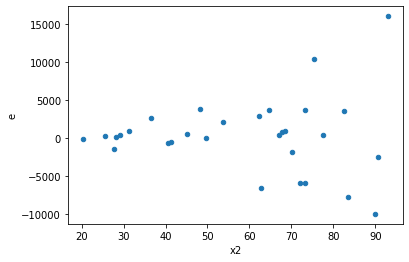

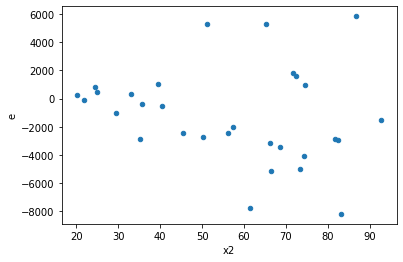

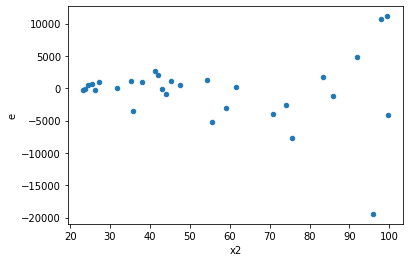

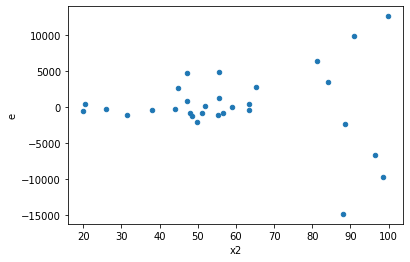

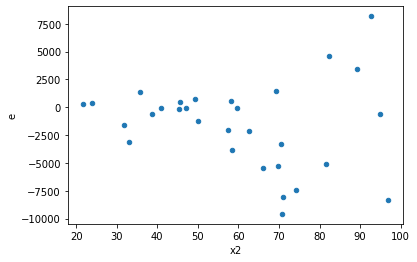

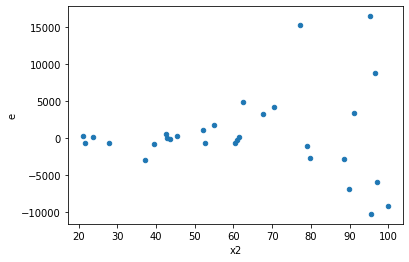

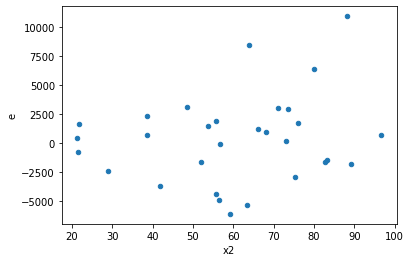

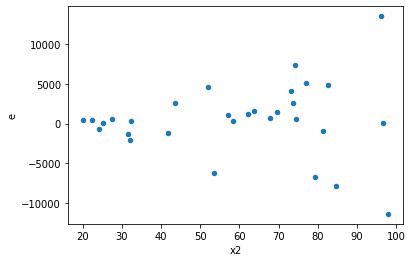

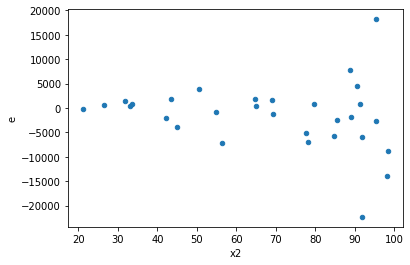

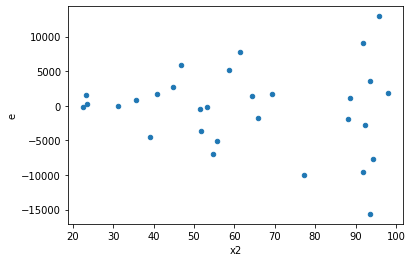

In [9]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,
6.0,10.0,10.0,56445005.276046745,141627526.02036768,5644500.527604675,14162752.602036769,2.5091241523981105,0.1628886675060084,0.9185556662469958,0.0814443337530042,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,47831075.03053054,465874395.20270395,4783107.503053054,46587439.52027039,9.739994238167062,0.0012782204420538346,0.9993608897789731,0.0006391102210269173,Reject001=0 : Heteroscedasticity
8.0,10.0,10.0,379422277.686267,398835612.1442037,37942227.768626705,39883561.21442037,1.0511655103024524,0.9386637908569417,0.5306681045715291,0.46933189542847087,Reject001=1 : Homoscedasticity
10.0,10.0,10.0,155547868.42775285,210566558.82397848,15554786.842775285,21056655.88239785,1.3537090604477175,0.6410887798029352,0.6794556100985324,0.3205443899014676,Reject001=1 : Homoscedasticity
12.0,10.0,10.0,81036577.48073973,197836656.27453572,8103657.748073973,19783665.627453573,2.441325416557188,0.17537309533040513,0.9123134523347974,0.08768654766520256,Reject001=1 : Homoscedasticity
13.0,10.0,10.0,160216327.48346785,545997774.5551953,16021632.748346785,54599777.455519535,3.407878479873001,0.0661262265257172,0.9669368867371414,0.0330631132628586,Reject001=1 : Homoscedasticity
15.0,10.0,10.0,39755501.657626085,232519077.5344424,3975550.1657626084,23251907.75344424,5.848727040018108,0.009986685554058017,0.995006657222971,0.004993342777029008,Reject001=0 : Heteroscedasticity
16.0,10.0,10.0,58123629.10823407,259267951.00843868,5812362.910823407,25926795.10084387,4.460629093301223,0.02691489092221877,0.9865425545388906,0.013457445461109385,Reject001=1 : Homoscedasticity
18.0,10.0,10.0,106328729.39395663,179363333.00354874,10632872.939395662,17936333.300354876,1.6868755417831898,0.4225772224889095,0.7887113887555453,0.21128861124445475,Reject001=1 : Homoscedasticity


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,10.0,10.0,187489669.95308465,153347491.39668235,18748966.995308466,15334749.139668236,0.8178983483999643,0.7567526555520141,Reject001=1 : Homoscedasticity
1.0,10.0,10.0,140073090.81551722,49104727.076943025,14007309.081551721,4910472.707694302,0.35056502852226085,0.11352670847228885,Reject001=1 : Homoscedasticity
2.0,10.0,10.0,475741432.3611487,52665887.469467305,47574143.236114874,5266588.746946731,0.11070275550330277,0.0017546462978156791,Reject001=0 : Heteroscedasticity
3.0,10.0,10.0,415173510.5402351,254529299.4731652,41517351.05402351,25452929.94731652,0.6130672911717434,0.4526921531728306,Reject001=1 : Homoscedasticity
4.0,10.0,10.0,269017996.96964455,17321747.315377645,26901799.696964454,1732174.7315377644,0.06438880487736363,0.000166074937043815,Reject001=0 : Heteroscedasticity
5.0,10.0,10.0,438785528.30577147,245688632.4120063,43878552.83057715,24568863.24120063,0.5599287500676094,0.374335943033165,Reject001=1 : Homoscedasticity
6.0,10.0,10.0,56445005.276046745,141627526.02036768,5644500.527604675,14162752.602036769,2.5091241523981105,0.1628886675060084,Reject001=1 : Homoscedasticity
7.0,10.0,10.0,47831075.03053054,465874395.20270395,4783107.503053054,46587439.52027039,9.739994238167062,0.0012782204420538346,Reject001=0 : Heteroscedasticity
8.0,10.0,10.0,379422277.686267,398835612.1442037,37942227.768626705,39883561.21442037,1.0511655103024524,0.9386637908569417,Reject001=1 : Homoscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    535
Reject001=1 : Homoscedasticity      465
Name: Result_test, dtype: int64